In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
X = df[['Level']].values # Features (Level)
y = df['Salary'].values # Target (Salary)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
y_pred_linear = lin_reg.predict(X)
r2_linear = r2_score(y, y_pred_linear)

print(f"R2 Score of Simple Linear Regression: {r2_linear}")

R2 Score of Simple Linear Regression: 0.6690412331929895


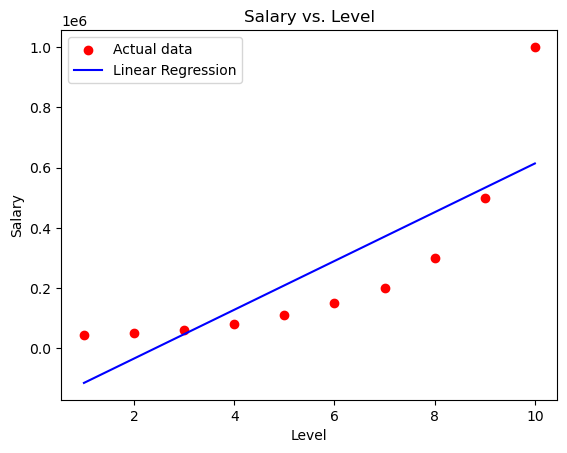

In [10]:
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression')
plt.title('Salary vs. Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [11]:
levels_to_predict = np.array([[11], [12]])

salary_pred_linear = lin_reg.predict(levels_to_predict)
print(f"Linear Regression Predictions for Levels 11 and 12:{salary_pred_linear}")

Linear Regression Predictions for Levels 11 and 12:[694333.33333333 775212.12121212]


In [12]:
#q2

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Create a sample weather forecast dataset
data = {
    'Outlook': ['Sunny', 'Overcast', 'Rain', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Rain', 'Sunny', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Hot', 'Mild', 'Cool', 'Mild', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'High', 'Normal'],
    'Windy': [False, False, False, True, False, True, True, False, True, True],
    'Play': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

In [15]:
# Step 1: Convert categorical features into numeric format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])

In [16]:
# Step 2: Split the dataset into features and target
X = df_encoded.drop(columns=['Play'])
y = df['Play']

In [17]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Step 4: Train the Naive Bayes model
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [19]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [20]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")

Model Performance:
Accuracy: 0.00%


In [21]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00       0.0
         Yes       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_

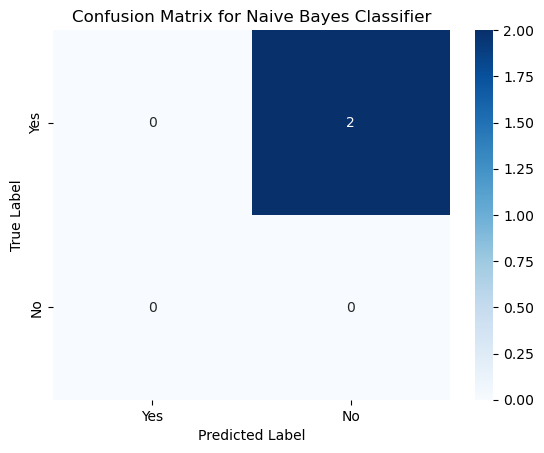

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()